# Dimensionality Reduction with Principal Component Analysis

Imagine you were given the choice to work with one of two sets of images, with the images in the first set being $100\times 100$ pixels and the images in the second set being $500\times 500$ pixels. You've been told that, although the first set is of lower resolution, both sets of images contain nearly the same information. You would likely choose to work with the lower resolution images. Why? Because **working directly with high dimensional data is difficult** - it's computationally slow and hard to analyze and storage of the data vectors can be expensive. Luckily, there are correlations between dimensions in high-dimensional data so that the data has an intrinsic lower-dimensional structure. Dimensionality reduction is all about extracting and working with this lower-dimensional structure to make our lives easier while still retaining important information about the data. Although there are several dimensionality reduction techniques, this notebook considers Principal Component Analysis (PCA) only. This notebook includes how PCA is used in practice, why PCA works, and practical aspects in implementing PCA.

## PCA in Practice
We will consider the [Wine dataset](https://archive.ics.uci.edu/ml/datasets/Wine)$^{[1]}$ as a simple example (this may take a few seconds to load).

In [7]:
import numpy as np #helpful library for working with numbers
import matplotlib.pyplot as plt #library for creating plots
#Wine dataset
from sklearn import datasets 
wine=datasets.load_wine()

X=wine.data
N,D=np.shape(X)
print("This dataset has",N,"examples, each characterized by",D,"features.")

This dataset has 178 examples, each characterized by 13 features.


Each example $x_{n} \in \mathbb{R}^{D}$ can be represented as a point in 13-dimensional space where $n = 1,2,...178$ and $D = 13$. We aim to find projections $\tilde{x}_{n}$ that are similar to $x_{n}$ but are of lower dimension. First we standardize our original dataset by, for each feature, centering each point about the mean and then dividing by the standard deviation. That is, 

$x_{n,d} \leftarrow \frac{x_{n,d}-\mu_{d}}{\sigma_{d}}$

,where $x_{n,d}$ is the $d^{th}$ feature of the $n^{th}$ example, $\mu_{d}$ is the mean and $\sigma_{d}$ is the standard deviation of the $d^{th}$ feature. Standardization is equivalent to finding the z-score for each $x_{n,d}$:

In [9]:
#get average and standard deviation for each feature
avgs=np.zeros(D)
std_devs=np.zeros(D)
for i in range(D):
    avgs[i]=np.mean(X[:,i])
    std_devs[i]=np.std(X[:,i])
#standardize each datapoint    
    for j in range(N):
        X[j,i]=(X[j,i]-avgs[i])/std_devs[i]

The correlation matrix of our dataset is given by $S=\frac{1}{N} \sum_{n=1}^{N}x_{n}x_{n}^{\top}$ where $x_{n}$ is transposed so that each example is a column rather than a row, making $X$ a $D\times N$ matrix instead of a $N\times D$ matrix. Note that if we didn't normalize our data, $S$ would be a covariance matrix.

In [10]:
#Covariance matrix
S=np.cov(X.T)
print(np.shape(S))

(13, 13)


Let's assume that there is a low-dimensional representation of our dataset given by the coordinates $z_{n}=B^{\top}x_{n}\in\mathbb{R}^{M}$, where $B$ is the projection matrix given by the orthonormal basis vectors of the $M$-dimensional subspace $U$ of $D$. That is...

$B=[b_{1},...,b_{M}]\in\mathbb{R}^{M}$

$U\subseteq\mathbb{R}^{D}, dim(U)=M<D$

Our projections are then given by $\tilde{x}_{n}=\sum_{n=1}^{N}z_{mn}b_{m}\in\mathbb{R}^{D}$

This whole dimensionality reduction thing seems straightforward as long as we can find a good $B$. It turns out (and we'll show this) that the eigenvectors corresponding to the $M$-largest eigenvalues of our data correlation matrix $S$ give us the orthonormal basis vectors $[b_{1},...,b_{M}]$. We can then project any standardized datapoint $x_{*}\in\mathbb{R}^{D}$ onto this $M$-dimensional subspace, also known as the **principal subspace**. Once we've projected onto the principal subspace, we undo the standardization of the datapoint so the projection is on the original dataspace.

Note that one can perform PCA on data that isn't standardized, which would save us from having to standardize any points we want to project onto the principal subspace. However, if the dataset's feature values are of different scales or units, standardization is a good idea to ensure that a feature doesn't overwhelm the PCA$^{[2]}$. For example, if one feature is expressed in centimetres, its variance is 1000 times what it would be if it were expressed in metres. We'll see in the next section that, because of this seemingly high variance, this variable would highly influence on the shaping of the PCs.

Further note that the proof for PCA is linear algebra-heavy and it may be useful to review some concepts before proceeding: [Eigenvalues and eigenvectors](http://setosa.io/ev/eigenvectors-and-eigenvalues/)$^{[3]}$, [Basis vectors](https://medium.com/linear-algebra/part-16-dimension-and-basis-46efe6f1fa56)$^{[4]}$, [Subspaces](https://yutsumura.com/linear-algebra/subspaces-in-rn/)$^{[5]}$, [Orthogonality/Orthonormality](https://brilliant.org/wiki/orthogonality-and-orthonormality/)$^{[6]}$, [Inner/dot products](https://brilliant.org/wiki/inner-product-space/)$^{[7]}$, [Projection matrices](https://medium.com/linear-algebra/part-17-projections-122aac21b07c)$^{[8]}$, and [Spectral theorem](https://brilliant.org/wiki/spectral-theorem/)$^{[9]}$.

## PCA Derivation - "Maximum Variance" Perspective 

*This proof comes from the text* Mathematics for Machine Learning$^{[10]}$.

We want our low-dimensional representation to keep as much information as possible from the original dataset. Information in a dataset can be described by its variance - more information means greater variance. Therefore we want our lower-dimensional compressed representation $z$ to capture the largest amount of variance dataset **$X$**.

Working with just $z_{1}$ of $z\in\mathbb{R}^{M}$ for now, we need a basis vector $b_{1}\in\mathbb{R}^{D}$ such that 

$V_{1}=\mathbb{V}[z_{1}]=\frac{1}{N}\sum_{n=1}^{N}z_{1n}^{2}$ 

is maximized where $z_{1n}$ is the first coordinate of $z_n\in\mathbb{R}^{M}$ of $x_{n}\in\mathbb{R}^{D}$.

Using $z_{1n}=b_{1}^{\top}x_{n}$ and the fact that the dot product is symmetric, this variance can be re-written as

$V_{1}=\frac{1}{N}\sum_{n=1}^{N}(b_{1}^{\top}x_{n})^{2}$

$=\frac{1}{N}\sum_{n=1}^{N}b_{1}^{\top}x_{n}x_{n}^{\top}b_{1}$

$=b_{1}^{\top}(\frac{1}{N}\sum_{n=1}^{N}x_{n}x_{n}^{\top})b_{1}$

$=b_{1}^{\top}Sb_{1}$

Since arbitrarily increasing the magnitude of $b_{1}$ increases $V_{1}$, we restrict $b_{1}$ such that its norm is $1 \implies \|b_{1}\|^{2}=1$. Putting $V_{1}$ and this restriction together yields the constrained optimization problem 

$\max_{b_{1}} b_{1}^{\top}Sb_{1}$ *subject to* $\|b_{1}\|^{2}=1$

Using Lagrange multipliers to turn this into an unconstrained problem yields the Lagrangian

$\mathcal{L}(b_{1},\lambda)=b_{1}^{\top}Sb_{1}+\lambda_{1}(1-b_{1}^{\top}b_{1})$

To optimize the Lagrangian, take partial derivatives with respect to $b_{1}$ and $\lambda$ and set to zero:

$\frac{\partial\mathcal{L}}{\partial b_{1}}=0=2b_{1}^{\top}S-2\lambda_{1}b_{1}^{\top} \rightarrow Sb_{1}=\lambda_{1}b_{1}$

This expression is an eigendecomposition with $b_{1}$ as the eigenvector of $S$ with corresponding eigenvalue $\lambda_1$! Let's see what we get for $\frac{\partial\mathcal{L}}{\partial \lambda_{1}}$

$\frac{\partial\mathcal{L}}{\partial \lambda_{1}}=0=1-b_{1}^{\top}b_{1} \rightarrow 1=b_{1}^{\top}b_{1}$

Using these partials, our expression for variance, $V_{1}$, becomes

$V_{1}=b_{1}^{\top}Sb_{1}$

$=\lambda_{1}b_{1}^{\top}b_{1}$

$=\lambda_{1}$

What a cool result! The variance of the original dataset projected onto a 1D subspace equals the eigenvalue associated with the basis vector of the subspace. Since we want to maximize the variance, we choose the largest eigenvalue. The corresponding eigenvector is the basis vector and is called the first ***principal component*** (PC). Generally speaking, we can find the $m^{th}$ PC by first subtracting the effect of the first $m-1$ principal components from the original dataset and then finding the PC on the data that remains. This "remaining data" is given as

$\hat{X}=X-\sum_{i=1}^{m-1}b_{i}b_{i}^{\top}X$

$=X-B_{m-1}X$

Just as before, the constrained optimization problem to maximize the variance is

$\max_{b_{m}} b_{m}^{\top}\hat{S}b_{m}$ *subject to* $\|b_{1}\|^{2}=1$ 

,where $\hat{S}$ is the correlation matrix for $\hat{X}$. We know how to solve this - we just did it for $V_{1}$!

We could repeat this process in order to find all $2$ to $m$ PCs and their variances, but that would be a lot of work... luckily it turns out that every eigenvalue/eigenvector of $S$ is an eigenvalue/eigenvector of $\hat{S}$! This lets us find all eigenvalues/eigenvectors of $S$ and pick the $M$-largest to make up $B$. To show that all eigenvalues/eigenvectors are the same for both $S$ and $\hat{S}$, we first need a result from spectral theorem: since $S$ and $\hat{S}$ are symmetric, their eigenvectors are orthonormal. Assuming we have already found $m-1$ eigenvectors of $S$ and considering $b_{i}$ of $S$, we have

$\hat{S}b_{i}=\frac{1}{N}\hat{X}\hat{X}^{\top}b_{i}$

$=\frac{1}{N}(X-B_{m-1}X)(X-B_{m-1}X)^{\top}b_{i}$

$=(S-SB_{m-1}-B_{m-1}S+B_{m-1}SB_{m-1})b_{i}$ $\star$

If $i\geq m$, then $b_{i}$ isn't among the first $m-1$ PCs. Since $b_{i}$ is orthogonal to all column vectors in $B_{m-1}$, all $B_{m-1}b_{i}$ terms in equation$\star$ equal $0$. Equation$\star$ simplifies:

$\hat{S}b_{i}=(S-B_{m-1}S)b_{i}$

If we consider that we're finding the $m^{th}$ eigenvector...

$\hat{S}b_{m}=Sb_{m}=\lambda_{m}b_{m}$

This shows that $\lambda_m$ is the $m^{th}$ largest eigenvalue for both $S$ and $\hat{S}$ and the corresponding eigenvector for both $S$ and $\hat{S}$ is $b_{m}$. 

What about the case where $i<m$? If $i<m$, then $b_{i}$ is among the first $m-1$ PCs. Since $b_{i}$ is a vector onto which orthonormal matrix $B_{m-1}$ projects, all $B_{m-1}b_{i}$ terms in equation$\star$ equal $b_{i}$. Equation$\star$ simplifies:

$\hat{S}b_{i}=(Sb_{i}-Sb_{i}-B_{m-1}Sb_{i}+B_{m-1}Sb_{i})=0=0b_{i}$

This tells us that $b_{i}$ are also eigenvectors of $\hat{S}$ but their associated eigenvalue is $0$. Putting this all together, we choose the columns of $B$ to be the $M$ eigenvectors of the data covariance matrix $S$ that are associated with the $M$ largest eigenvalues. By choosing this, we project our data onto a lower $M$-dimensional subspace of $\mathbb{R}^{D}$ that retains as much information in the original data as possible. This "as much information as possible" is given as the total variance retained by the $M$ eigenvectors and is the sum of the corresponding eigenvalues $\rightarrow V_{M}=\sum_{m=1}^{M} \lambda{m}$

While this was a heavy proof, making use of this in Python is straightforward:

In [11]:
#Find eigenvalues and eigenvectors of S
var, b=np.linalg.eig(S)
#Python doesn't automatically sort eigvals/eigvects so we'll do it now
idx=var.argsort()[::-1]
var=var[idx].real #no imaginary part
b=b[:,idx].real 

It's easy enough to find the eigenvalues and eigenvectors, but how many should we keep to build $B$? In other words, what dimension should our $M$-dimensional subspace be? Since the eigenvalues represent the variance explained by the eigenvectors, if we keep all of them, 100% of our data will be explained but the dimension of the data won't be reduced at all. Plotting the eigenvalues and the total captured variance can help us decide how many PCs to keep.

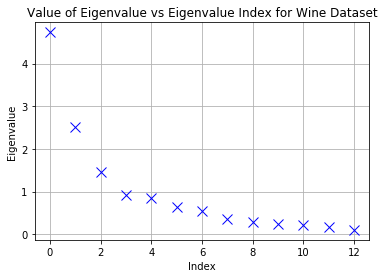

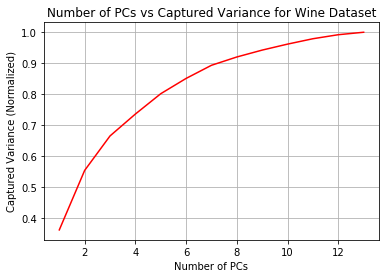

In [14]:
len_var=len(var)
#Eigenvalues
plt.plot(range(len_var),var[0:len_var],'bx',ms=10)
plt.grid(True)
plt.title('Value of Eigenvalue vs Eigenvalue Index for Wine Dataset');plt.xlabel('Index');plt.ylabel('Eigenvalue')
plt.show()

#Cumulative % variance explained by eigenvectors
plt.plot(range(1,len_var+1),np.cumsum(var)/np.sum(var),'r',ms=10)
plt.grid(True)
plt.title('Number of PCs vs Captured Variance for Wine Dataset');plt.xlabel('Number of PCs');plt.ylabel('Captured Variance (Normalized)')
plt.show()

From these plots, we can see that most of the variance is explained by the first 5 PCs. This corresponds to the elbow in the first plot and these PCs explain ~80% of the total variance of the data. Therefore, for this example, our $B$ is given as follows:

In [15]:
B=b[:,0:5]
np.shape(B)

(13, 5)

Now that we have $B$, we can reconstruct any of our original datapoints $x_{*}$ using $\tilde{x}_{*}=BB^{\top}x_{*}$ and it turns out that the average squared reconstruction error is minimized. That is, maximizing the variance of the data projected onto the principal subspace is equivalent to minimizing 

$\frac{1}{N}\sum_{n=1}^{N}\|x_{n}-\tilde{x}_{n}\|^{2}$

The proof of this has been omitted from this notebook$^{[10]}$. The point is, we can be confident that this reconstructed data is as similar to the original data as can be considering that a 5-dimensional projection matrix was used. Below is an illustration of reconstruction and the effect of retaining a different number of PCs.

Text(0, 0.5, 'Standardized Feature value')

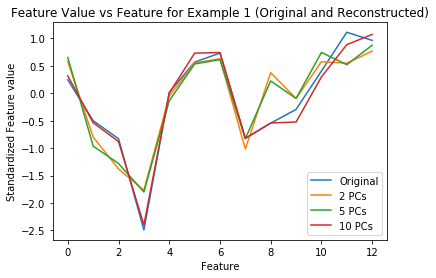

In [16]:
#reconstruction with 5 PCs (the amount we chose to keep for this example)
X_recon=B.dot(B.T).dot(X.T)
#reconstruction with 2 PCs
B_2PCs=b[:,0:3]
X_2PCs=B_2PCs.dot(B_2PCs.T).dot(X.T)
#reconstruction with 10 PCs
B_10PCs=b[:,0:10]
X_10PCs=B_10PCs.dot(B_10PCs.T).dot(X.T)

#plot first example (standardized, 1 wine characterized by 13 features)
#we wouldn't typically plot an example like this but are doing so to illustrate the effect of retaining more PCs
plt.plot(X[1,:]) #original
plt.plot(range(len_var),X_2PCs.T[1,:],range(len_var),X_recon.T[1,:],range(len_var),X_10PCs.T[1,:]) #reconstructed
plt.legend(['Original','2 PCs','5 PCs','10 PCs'])
plt.title('Feature Value vs Feature for Example 1 (Original and Reconstructed)')
plt.xlabel('Feature');plt.ylabel('Standardized Feature value')

Clearly, the more PCs retained, the better the reconstruction and the smaller the distance between the original data and the reconstructed data. Regardless of how many PCs we retain, we can use the reconstructed data as the training examples for any machine learning algorithm of our choosing. At test time, test points must first be standardized and projected onto the subspace before using our model to make a prediction.

## Practical Aspects in Implementing PCA

So far we have only considered implementing PCA on datasets that have only unique and independent examples, resulting in a full-rank covariance matrix. If we have a dataset with duplicated examples or examples that are multiples of other examples, the resulting covariance matrix will be rank deficient and eigendecomposition will not work. Luckily we can use [singular value decomposition](http://mathworld.wolfram.com/SingularValueDecomposition.html)$^{[11]}$ (SVD) instead.

The SVD of a real-valued $D\times N$ data matrix is given as $X=U\Sigma V^{\top}$, where $U\in \mathbb{R}^{D\times D}$ and $V^{\top} \in \mathbb{R}^{N\times N}$ are orthogonal matrices and $\Sigma \in \mathbb{R}^{D\times N}$ is a diagonal matrix with singular values $\sigma_{ii} >0$ as its entries. Using this factorization of $X$, $S$ can be written as

$S=\frac{1}{N}=U\Sigma V^{\top}V\Sigma^{\top}U^{\top}$

$=\frac{1}{N}U\Sigma \Sigma^{\top}U^{\top}$

From spectral theorem, the columns of $U$ are the eigenvectors of $S$ and the eigenvalues are related to the singular values of $X$ by $\lambda_{d}=\frac{\sigma_{d}^{2}}{N}$. This means that the singular values of $X$ are related to the variance of the dataset! Recognizing this, we can take advantage of Eckhart-Young Theorem$^{[10]}$: projections $\tilde{X}_M$ are given by truncating the SVD at the $M^{th}$ singular value. That is, our data projections are given by

$\tilde{X}_M=U_{M}\Sigma_{M}V_{M}^{\top} \in \mathbb{R}^{D\times N}$

This allows us to find $\tilde{X}_{M}$ for any and all datasets, including those with repeated examples. This also allows us to find projections without explicitly finding $S$.

Not only is dealing with a rank deficient data matrix a practical issue, but so is dealing with a very large data matrix (for example: an MRI image consisting of $500\times 500$ pixels). For this image, the eigendecomposition would be for a $250,000 \times 250,000$ covariance matrix. We can avoid this computationally heavy task if we have many more dimensions $D$ than examples $N$ and if there are no duplicate examples (if we had $100$ unique MRI images, each with $250,000$ pixels). If this is the case, we can manipulate the eigenvector equation for $S$ so that we can perform the eigendecomposition on a $N\times N$ matrix instead of a $D\times D$ matrix.

Recall the eigenvector equation $Sb_{m}=\lambda_{m}b_{m}$ and the expression for $S$: $S=\frac{1}{N}XX^{\top}$. Replacing this expression for $S$ in the eigenvector equations yields

$\frac{1}{N}XX^{\top}b_{m}=\lambda_{m}b_{m}$

Multiplying both sides by $X^{\top}$ from the left-hand side yields

$\frac{1}{N}X^{\top}XX^{\top}b_{m}=\lambda_{m}X^{\top}b_{m}$

This is the eigenvector equation for the matrix $\frac{1}{N}X^{\top}X\in \mathbb{R}^{N\times N}$! To better see this, we'll replace $X^{\top}b_{m}$ with $c_{m}$:

$\frac{1}{N}X^{\top}Xc_{m}=\lambda_{m}c_{m}$

This tells us that the eigenvalues of this $N\times N$ matrix are the same as those for $S$ and that the corresponding eigenvectors are $\frac{1}{N}X^{\top}X$. We can use this to get the eigenvalues of $S$ and to decide how many eigenvalues/eigenvectors we want to keep for the principal subspace. Then we can recover the corresponding eigenvectors of the $D\times D$ matrix required for PCA by left-multiplying this new eigenvector equation by $X$:

$\frac{1}{N}XX^{\top}Xc_{m}=\lambda_{m}Xc_{m}$

This approach allows us to get the eigenvalues and eigenvectors required to perform PCA in a much more computationally efficient way compared to performing an eigendecomposition on a very large data covariance matrix.

## Explore it Further

One can appreciate that working with low-dimensional data is computationally easier to work with and to visualize compared to high-dimensional data. Recognizing this, there is a motivation for data reduction techniques, including PCA. In this notebook, we derived PCA from the perspective of maximizing the variance in the projected space, we implemented PCA on a toy dataset, and we illustrated the effect on the projected data of retaining a different number of PCs. Additionally, we provided how PCA can be implemented when dealing with a rank deficient data matrix or a very high dimensional matrix.

Considering that the basics were covered in this notebook, additional material and resources have been provided here:
<ul>
<li>Probabilistic-PCA and the derivation of PCA using a probabilistic model$^{[10]}$</li>
    <li>Iterative methods for finding eigenvalues and eigenvectors, including power iteration$^{[10]}$</li>
    <li>Other data reduction techniques, such as independent component analysis$^{[12]}$</li>

### References
[1] *Wine Data Set*, UCI Machine Learning Repository, [website]. Available: https://archive.ics.uci.edu/. [Accessed: Oct 27, 2019].

[2] J.E. Jackson, *A User's Guide to Principal Components*. Toronto, Canada: John Wiley & Sons Inc., 1991.

[3] *Eigenvectors and Eigenvalues*, Explained Visually, [website]. Available:  http://setosa.io. [Accessed: Oct 28, 2019].

[4] *Dimension and Basis*, Medium, [website]. Available: https://medium.com. [Accessed: Oct 29, 2019].

[5] *Subspaces in $\mathbb{R}^{n}$*, Problems in Mathematics, [website]. Available: https://yutsumura.com/. [Accessed: Oct 29, 2019].

[6] *Orthogonality and Orthonormality*, Brilliant, [website]. Available: https://brilliant.org/. [Accessed: Oct 29, 2019].

[7] *Inner Product Space*, Brilliant, [website]. Available: https://brilliant.org/. [Accessed: Oct 29, 2019].

[8] *Projections*, Medium, [website]. Available: https://medium.com. [Accessed: Oct 29, 2019].

[9] *Spectral Theorem*, Brilliant, [website]. Available: https://brilliant.org/. [Accessed: Oct 29, 2019].

[10] M.P. Deisenroth, A.A. Faisal, and C.S. Ong, *Mathematics for Machine Learning*. To be published by Cambridge University Press.

[11] *Singular Value Decomposition*, Wolfram Math World, [website]. Available: http://mathworld.wolfram.com/. [Accessed: Oct 29, 2019].

[12] *What is Independent Component Analysis?*, University of Helsinki Faculty of Science, [website]. Available: https://www.cs.helsinki.fi/u/. [Accessed: Oct 29, 2019].